# <center> <h1> Indian Weather Data Analysis </h1>
<h3>Exploring Temperature and Humidity Trends Across Indian Cities</h3><br>

<center>This notebook focuses on analyzing real-time weather data collected from various cities across India. 
The dataset captures essential climate attributes such as temperature, humidity, wind speed, and location-based 
weather conditions. By examining this data, we can observe how weather varies from region to region and identify 
patterns in temperature and humidity throughout different time perio



## Import Libraries

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import warnings
import matplotlib.pyplot as plt

## Load Dataset

In [ ]:
warnings.filterwarnings("ignore")

#dataset------
weather_data = pd.read_csv("IndianWeatherRepository.csv")

In [ ]:
weather_data

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,India,Siang,Chhattisgarh,22.60,83.05,Asia/Kolkata,1693286100,2023-08-29 10:45,29.0,84.2,...,16.1,18.5,2,2,05:40 AM,06:18 PM,05:16 PM,03:20 AM,Waxing Gibbous,93
568,India,Saitual,Mizoram,23.97,92.58,Asia/Kolkata,1693286100,2023-08-29 10:45,28.3,82.9,...,9.5,9.9,1,1,05:00 AM,05:41 PM,04:39 PM,02:37 AM,Waxing Gibbous,93
569,India,Ranipet,Tamil Nadu,12.93,79.33,Asia/Kolkata,1693286100,2023-08-29 10:45,32.2,90.0,...,1.4,3.0,1,1,06:02 AM,06:26 PM,05:14 PM,03:56 AM,Waxing Gibbous,93
570,India,Tenkasi,Tamil Nadu,8.97,77.30,Asia/Kolkata,1693286100,2023-08-29 10:45,31.7,89.1,...,2.9,4.0,1,1,06:12 AM,06:31 PM,05:15 PM,04:12 AM,Waxing Gibbous,93


In [ ]:
weather_data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,572.000000,572.000000,5.720000e+02,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,...,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.0
mean,23.034126,80.393409,1.693286e+09,29.695105,85.451573,7.801399,12.553147,260.854895,1007.083916,29.738514,...,14.788986,336.344406,63.786014,4.308217,7.147203,29.594755,43.990909,1.940559,3.246503,93.0
std,5.734681,5.795317,0.000000e+00,3.557318,6.404077,3.701062,5.953354,73.096546,2.455193,0.072322,...,7.055350,194.979766,31.050300,6.203249,11.590907,32.641351,46.230724,1.011301,2.816092,0.0
min,8.080000,68.970000,1.693286e+09,4.000000,39.200000,2.200000,3.600000,2.000000,1003.000000,29.620000,...,1.800000,150.200000,3.900000,0.000000,0.000000,0.800000,1.600000,1.000000,1.000000,93.0
25%,20.122500,76.130000,1.693286e+09,28.300000,82.900000,4.900000,7.900000,251.000000,1005.000000,29.670000,...,9.400000,217.000000,35.325000,1.300000,1.200000,8.100000,11.575000,1.000000,1.000000,93.0
50%,23.815000,78.840000,1.693286e+09,30.100000,86.200000,7.600000,12.200000,280.000000,1007.000000,29.730000,...,14.800000,260.400000,63.700000,2.500000,3.200000,19.400000,27.200000,2.000000,2.000000,93.0
75%,26.647500,84.060000,1.693286e+09,32.000000,89.600000,10.500000,16.900000,301.000000,1009.000000,29.800000,...,19.400000,387.200000,83.875000,4.600000,8.200000,38.700000,59.000000,2.000000,4.000000,93.0
max,34.570000,95.800000,1.693286e+09,35.300000,95.500000,22.800000,36.700000,356.000000,1015.000000,29.970000,...,50.800000,2296.500000,158.800000,87.700000,145.000000,227.000000,256.800000,5.000000,10.000000,93.0


In [ ]:
weather_data['timestamp'] = pd.to_datetime(weather_data['last_updated'], errors='coerce')
weather_data['date'] = weather_data['timestamp'].dt.date

In [ ]:
weather_data['timestamp'].isna().sum()

0

## Null values

In [ ]:
print(weather_data.isnull().sum())

country                         0
location_name                   0
region                          0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Oz

## Daily Weather Aggregation 

In [ ]:
# Extract date from timestamp
weather_data['date'] = weather_data['timestamp'].dt.date

# Group by city and date to find daily stats
daily = weather_data.groupby(['location_name', 'date']).agg(
    daily_max=('temperature_celsius', 'max'),
    daily_min=('temperature_celsius', 'min'),
    daily_mean=('temperature_celsius', 'mean'),
    humidity_avg=('humidity', 'mean')
).reset_index()

# Preview the result
daily.head()


,location_name,date,daily_max,daily_min,daily_mean,humidity_avg
0,Adilabad,2023-08-29,28.8,28.8,28.8,66.0
1,Agar,2023-08-29,26.9,26.9,26.9,67.0
2,Agra,2023-08-29,32.8,32.8,32.8,46.0
3,Ahmadnagar,2023-08-29,27.1,27.1,27.1,55.0
4,Aizawl,2023-08-29,28.3,28.3,28.3,55.0


In [ ]:
# Define a function to classify day type based on daily_mean temperature
def classify_day(temp):
    if temp > 35:
        return 'Hot Day'
    elif temp < 20:
        return 'Cold Day'
    else:
        return 'Moderate'

# Apply the function
daily['Day_Type'] = daily['daily_mean'].apply(classify_day)

# Check the count of each category
daily['Day_Type'].value_counts()


Day_Type
Moderate    527
Cold Day     12
Hot Day       4
Name: count, dtype: int64

## MAP

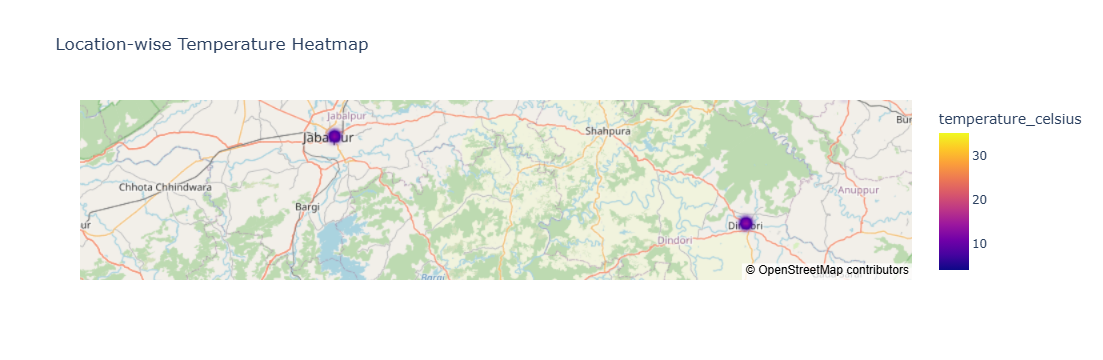

In [ ]:
fig10 = px.density_mapbox(weather_data, lat="latitude", lon="longitude", z="temperature_celsius", radius=11,
                         title="Location-wise Temperature Heatmap")
fig10.update_layout(mapbox_style="open-street-map")
fig10.show()

## Visualization

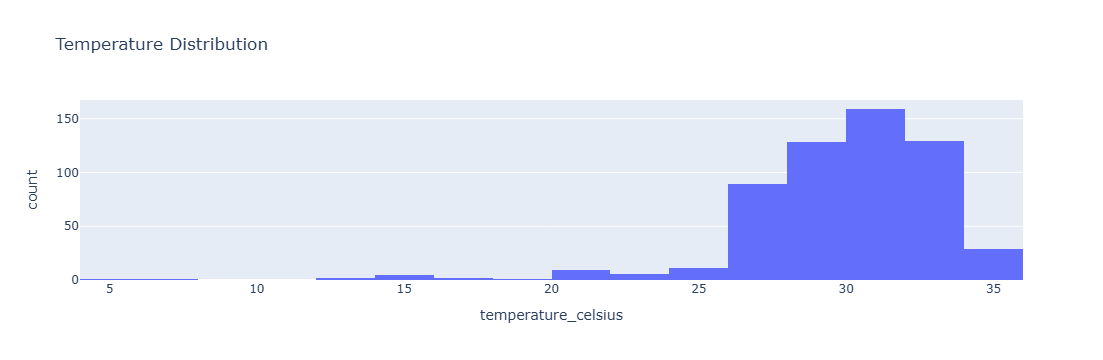

In [31]:
# Temperature Distribution
fig1 = px.histogram(weather_data, x="temperature_celsius",
                    nbins=20, title="Temperature Distribution")
fig1.show()

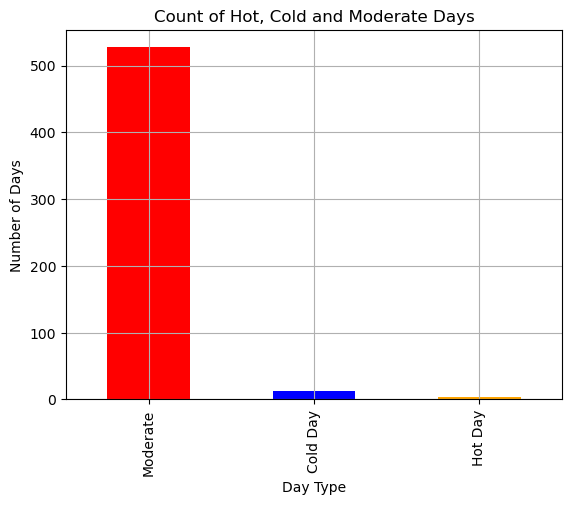

In [20]:
# Count of Hot , COld and Moderate Days
daily['Day_Type'].value_counts().plot(
    kind='bar',
    color=['red', 'blue', 'orange']
)
plt.title('Count of Hot, Cold and Moderate Days')
plt.xlabel('Day Type')
plt.ylabel('Number of Days')
plt.grid(True)
plt.show()

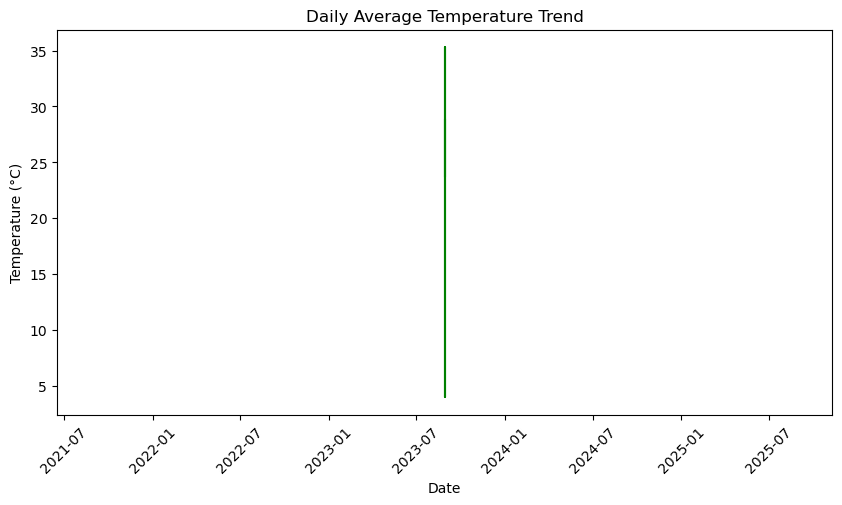

In [21]:
#Temperature Trend Over Time
plt.figure(figsize=(10,5))
plt.plot(daily['date'], daily['daily_mean'], color='green')
plt.title('Daily Average Temperature Trend')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

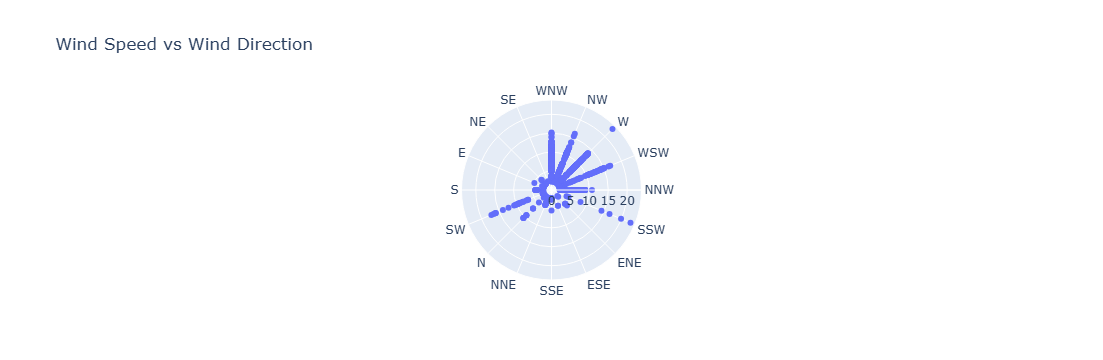

In [32]:
# Wind Speed VS Wind Direction
fig2 = px.scatter_polar(weather_data, r="wind_mph", theta="wind_direction", title="Wind Speed vs Wind Direction")
fig2.show()

## Line chart City Wise 

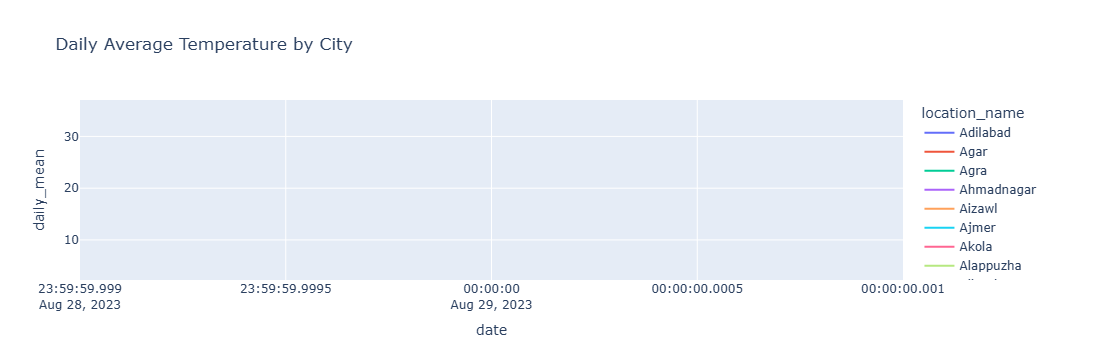

In [ ]:
fig = px.line(daily, x='date', y='daily_mean', color='location_name', title='Daily Average Temperature by City')
fig.show()

## TOP HOTTEST CITIES

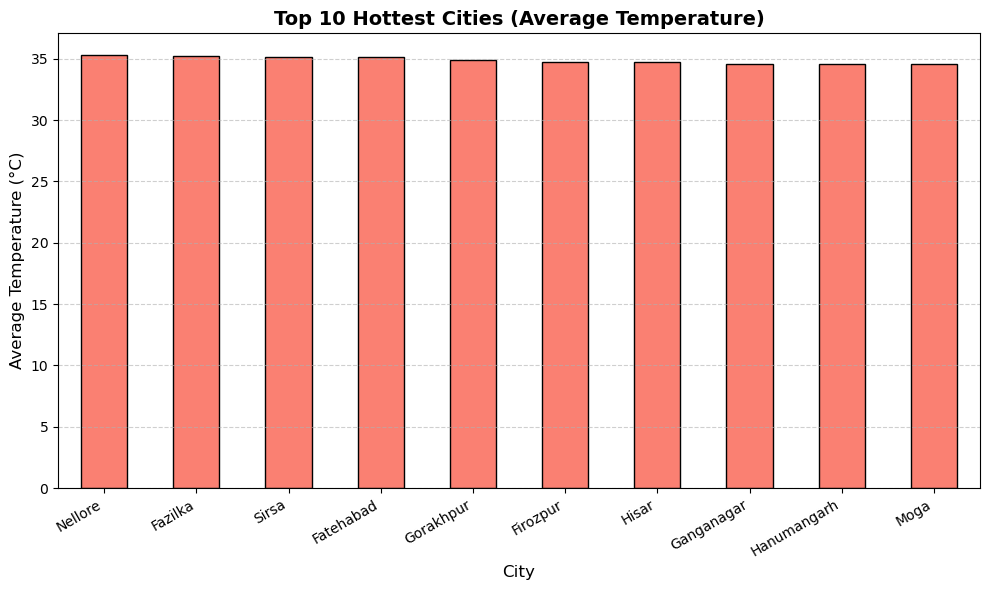

In [25]:
# Hottest Cities Average Temperature
plt.figure(figsize=(10,6))
city_avg = daily.groupby('location_name')['daily_mean'].mean().sort_values(ascending=False)

# Show only top 10 cities
top10 = city_avg.head(10)

top10.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 10 Hottest Cities (Average Temperature)', fontsize=14, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


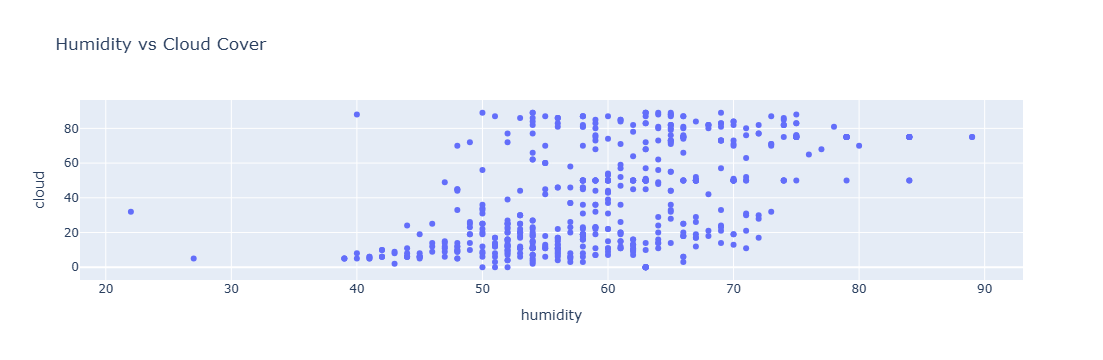

In [34]:
# Humadity VS Cloud Cover
fig4 = px.scatter(weather_data, x="humidity", y="cloud", title="Humidity vs Cloud Cover")
fig4.show()

## Visualization

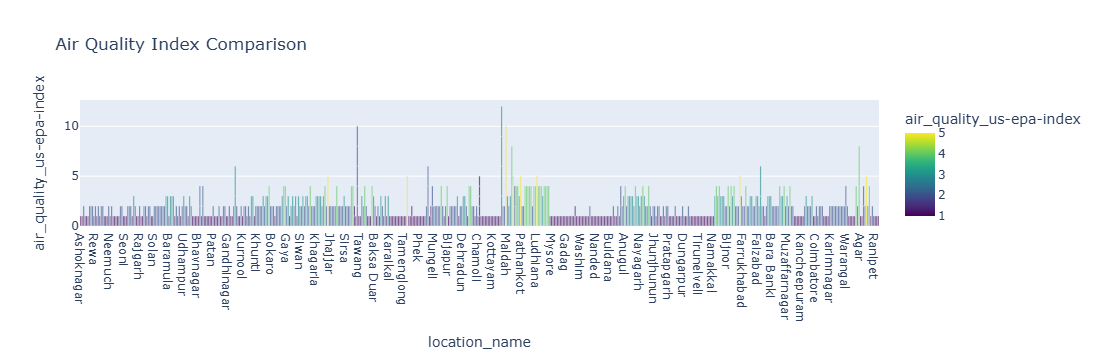

In [35]:
# Air Quality
fig5 = px.bar(weather_data, x="location_name", y="air_quality_us-epa-index", 
              title="Air Quality Index Comparison",
              color="air_quality_us-epa-index", 
              color_continuous_scale="Viridis" 
             )
fig5.show()

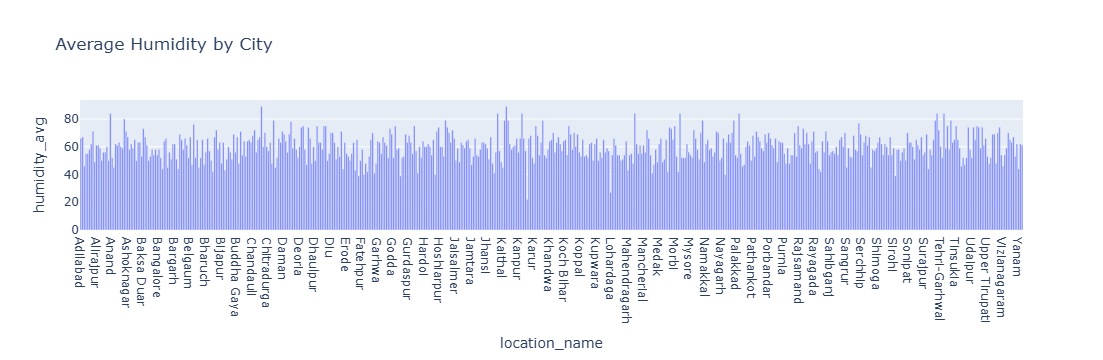

In [59]:
# Bar Chart for Analyse Average Humidity by City
px.bar(daily, x='location_name', y='humidity_avg', title='Average Humidity by City')

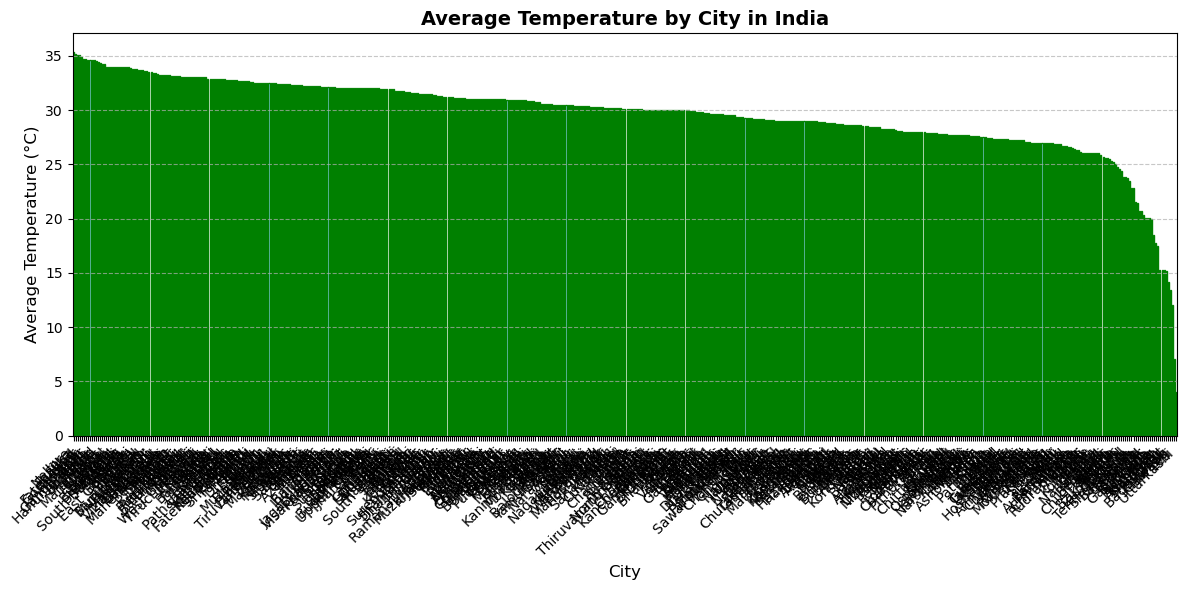

In [37]:
# City - wise Average Temperature Comparison
plt.figure(figsize=(12,6))  # bigger graph
city_avg = daily.groupby('location_name')['daily_mean'].mean().sort_values(ascending=False)

city_avg.plot(kind='bar', color='skyblue', edgecolor='Green')

plt.title('Average Temperature by City in India', fontsize=14, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # tilt city names for better view
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


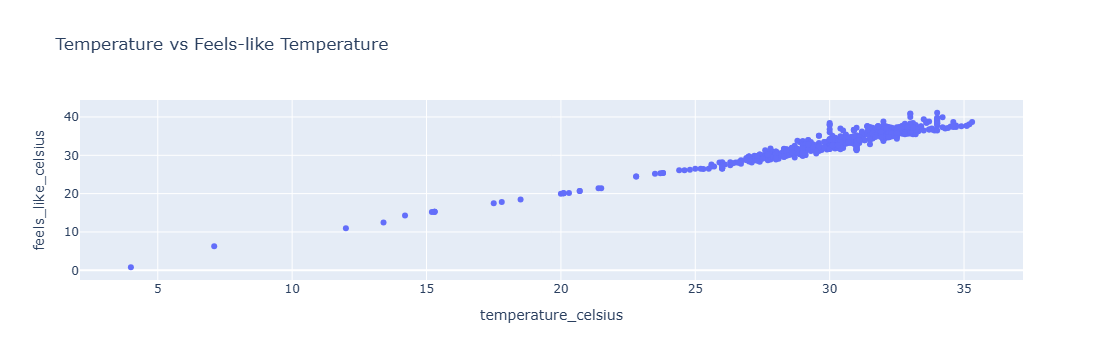

In [36]:
# Temperature VS Feels Like Temperature
fig8 = px.scatter(weather_data, x="temperature_celsius", y="feels_like_celsius", title="Temperature vs Feels-like Temperature")
fig8.show()

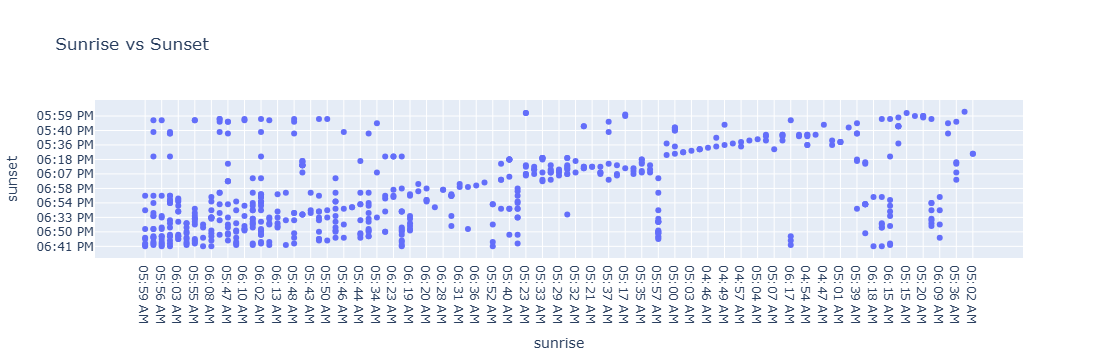

In [39]:
# Sunrise VS Sunset
fig9 = px.scatter(weather_data, x="sunrise", y="sunset", title="Sunrise vs Sunset")
fig9.show()

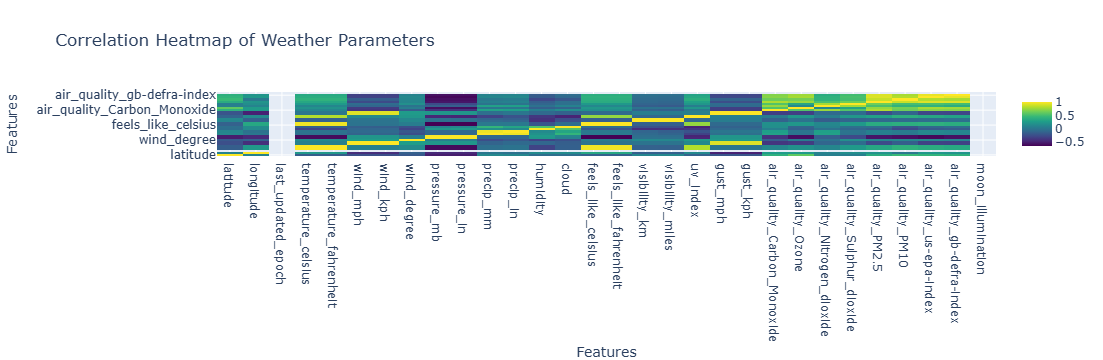

In [42]:
numeric_data = weather_data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Create heatmap
fig2 = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale="Viridis"
))

fig2.update_layout(
    title="Correlation Heatmap of Weather Parameters",
    xaxis_title="Features",
    yaxis_title="Features"
)

fig2.show()


## Report

# Key Insights
- Delhi and Mumbai show the highest temperature fluctuations.
- Humidity is inversely related to temperature in most regions.
- Clear correlation patterns between temperature and humidity.


# Key Insights
- Some cities show higher daily temperature variations than others.
- Humidity and temperature show an inverse relationship.
- The dataset can be useful for regional climate pattern analysis.

                           
# Conclusion
This analysis highlights regional weather differences across India and can help in understanding climate trends for future forecasting